In [4]:
library(ape)
library(treeio)
library(ggtree)
library(ggplot2)
library(tidyverse)

treeio v1.21.2.001 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

LG Wang, TTY Lam, S Xu, Z Dai, L Zhou, T Feng, P Guo, CW Dunn, BR
Jones, T Bradley, H Zhu, Y Guan, Y Jiang, G Yu. treeio: an R package
for phylogenetic tree input and output with richly annotated and
associated data. Molecular Biology and Evolution. 2020, 37(2):599-603.
doi: 10.1093/molbev/msz240

Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods
for mapping and visualizing associated data on phylogeny using ggtree.
Molecular Biology and Evolution. 2018, 35(12):3041-3043.
doi:10.1093/molbev/msy194

S Xu, Z Dai, P Guo, X Fu, S Liu, L Zhou, W Tang, T Feng, M Chen, L
Zhan, T Wu, E Hu, Y Jiang, X Bo, G Yu. ggtreeExtra: Compact
visualization of richly annotated phylogenetic data. Molecular Biology
and Evolution. 2021, 38(9):4039-4042. doi: 10.1093/molbev/msab166 


Attaching package: 'treeio'


The following 

In [9]:
setwd("/Users/ben/projects/Doran_etal_2022")

In [3]:
ddir = file.path(getwd(), "data", "exp_pro", "BB669")
tdir = file.path(getwd(), "_research", "BB669_16S_phyml")

In [6]:
pdir = file.path(getwd(), "plots", "BB669_16Strees")
dir.create(pdir, FALSE, TRUE)

## 16S tree

In [7]:
file.path(tdir, "subset_alignment.csv")

[1] "/Users/ben/projects/Doran_etal_2022/_research/BB669_16S_phyml/subset_alignment.csv"

In [8]:
tree = read.newick(file.path(tdir, "BB669_16S.phy-supporttree_multi.txt"), node.label='support')

In [9]:
lineagedf = read.csv(file.path(ddir, "BB669_rowmeta.csv"))
lineagedf$label = lineagedf$ID
subset_lineagedf = lineagedf[match(tree@phylo$tip.label, lineagedf$label),]

In [10]:
subset_lineagedf %>% dim

[1] 668  26

In [11]:
biggerfamily_ncbi = sort(table(subset_lineagedf$family_ncbi), decreasing = TRUE)[sort(table(subset_lineagedf$family_ncbi), decreasing = TRUE) > 0]

In [12]:
labels(biggerfamily_ncbi)[[1]]

[1] "Lachnospiraceae"              "Bacteroidaceae"              
 [3] "Bifidobacteriaceae"           "Tannerellaceae"              
 [5] "Prevotellaceae"               "Rikenellaceae"               
 [7] "Erysipelotrichaceae"          "<unclassified>"              
 [9] "Odoribacteraceae"             "Oscillospiraceae"            
[11] "Enterobacteriaceae"           "Eubacteriales incertae sedis"

In [11]:
# biggerphylum  = sort(table(subset_lineagedf$phylum), decreasing = TRUE)[sort(table(subset_lineagedf$phylum), decreasing = TRUE) > 100]
# bigphylum = subset_lineagedf$phylum
# bigphylum[!(bigphylum %in% names(biggerphylum))] = "Misc. (# < 100)"
# bigphylum[bigphylum == ""] = "unknown"
# subset_lineagedf$bigphylum = bigphylum

In [13]:
tree_withdata = as.treedata(left_join(as_tibble(tree), subset_lineagedf, by='label'))

In [ ]:
# tree_withdata = di2multi(tree_withdata, tol=.0000001)

In [14]:
btree_tbl = as_tibble(tree_withdata)

mode_family_ncbi = offspring(btree_tbl, btree_tbl$node, tiponly = FALSE, self_include = TRUE)
mode_family_ncbi = unlist(lapply(mode_family_ncbi, function(x) modeest::mfv1(x$family_ncbi, na_rm=TRUE)))

btree_tbl$mode_family_ncbi = mode_family_ncbi
tree_withdata = as.treedata(btree_tbl)

Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr



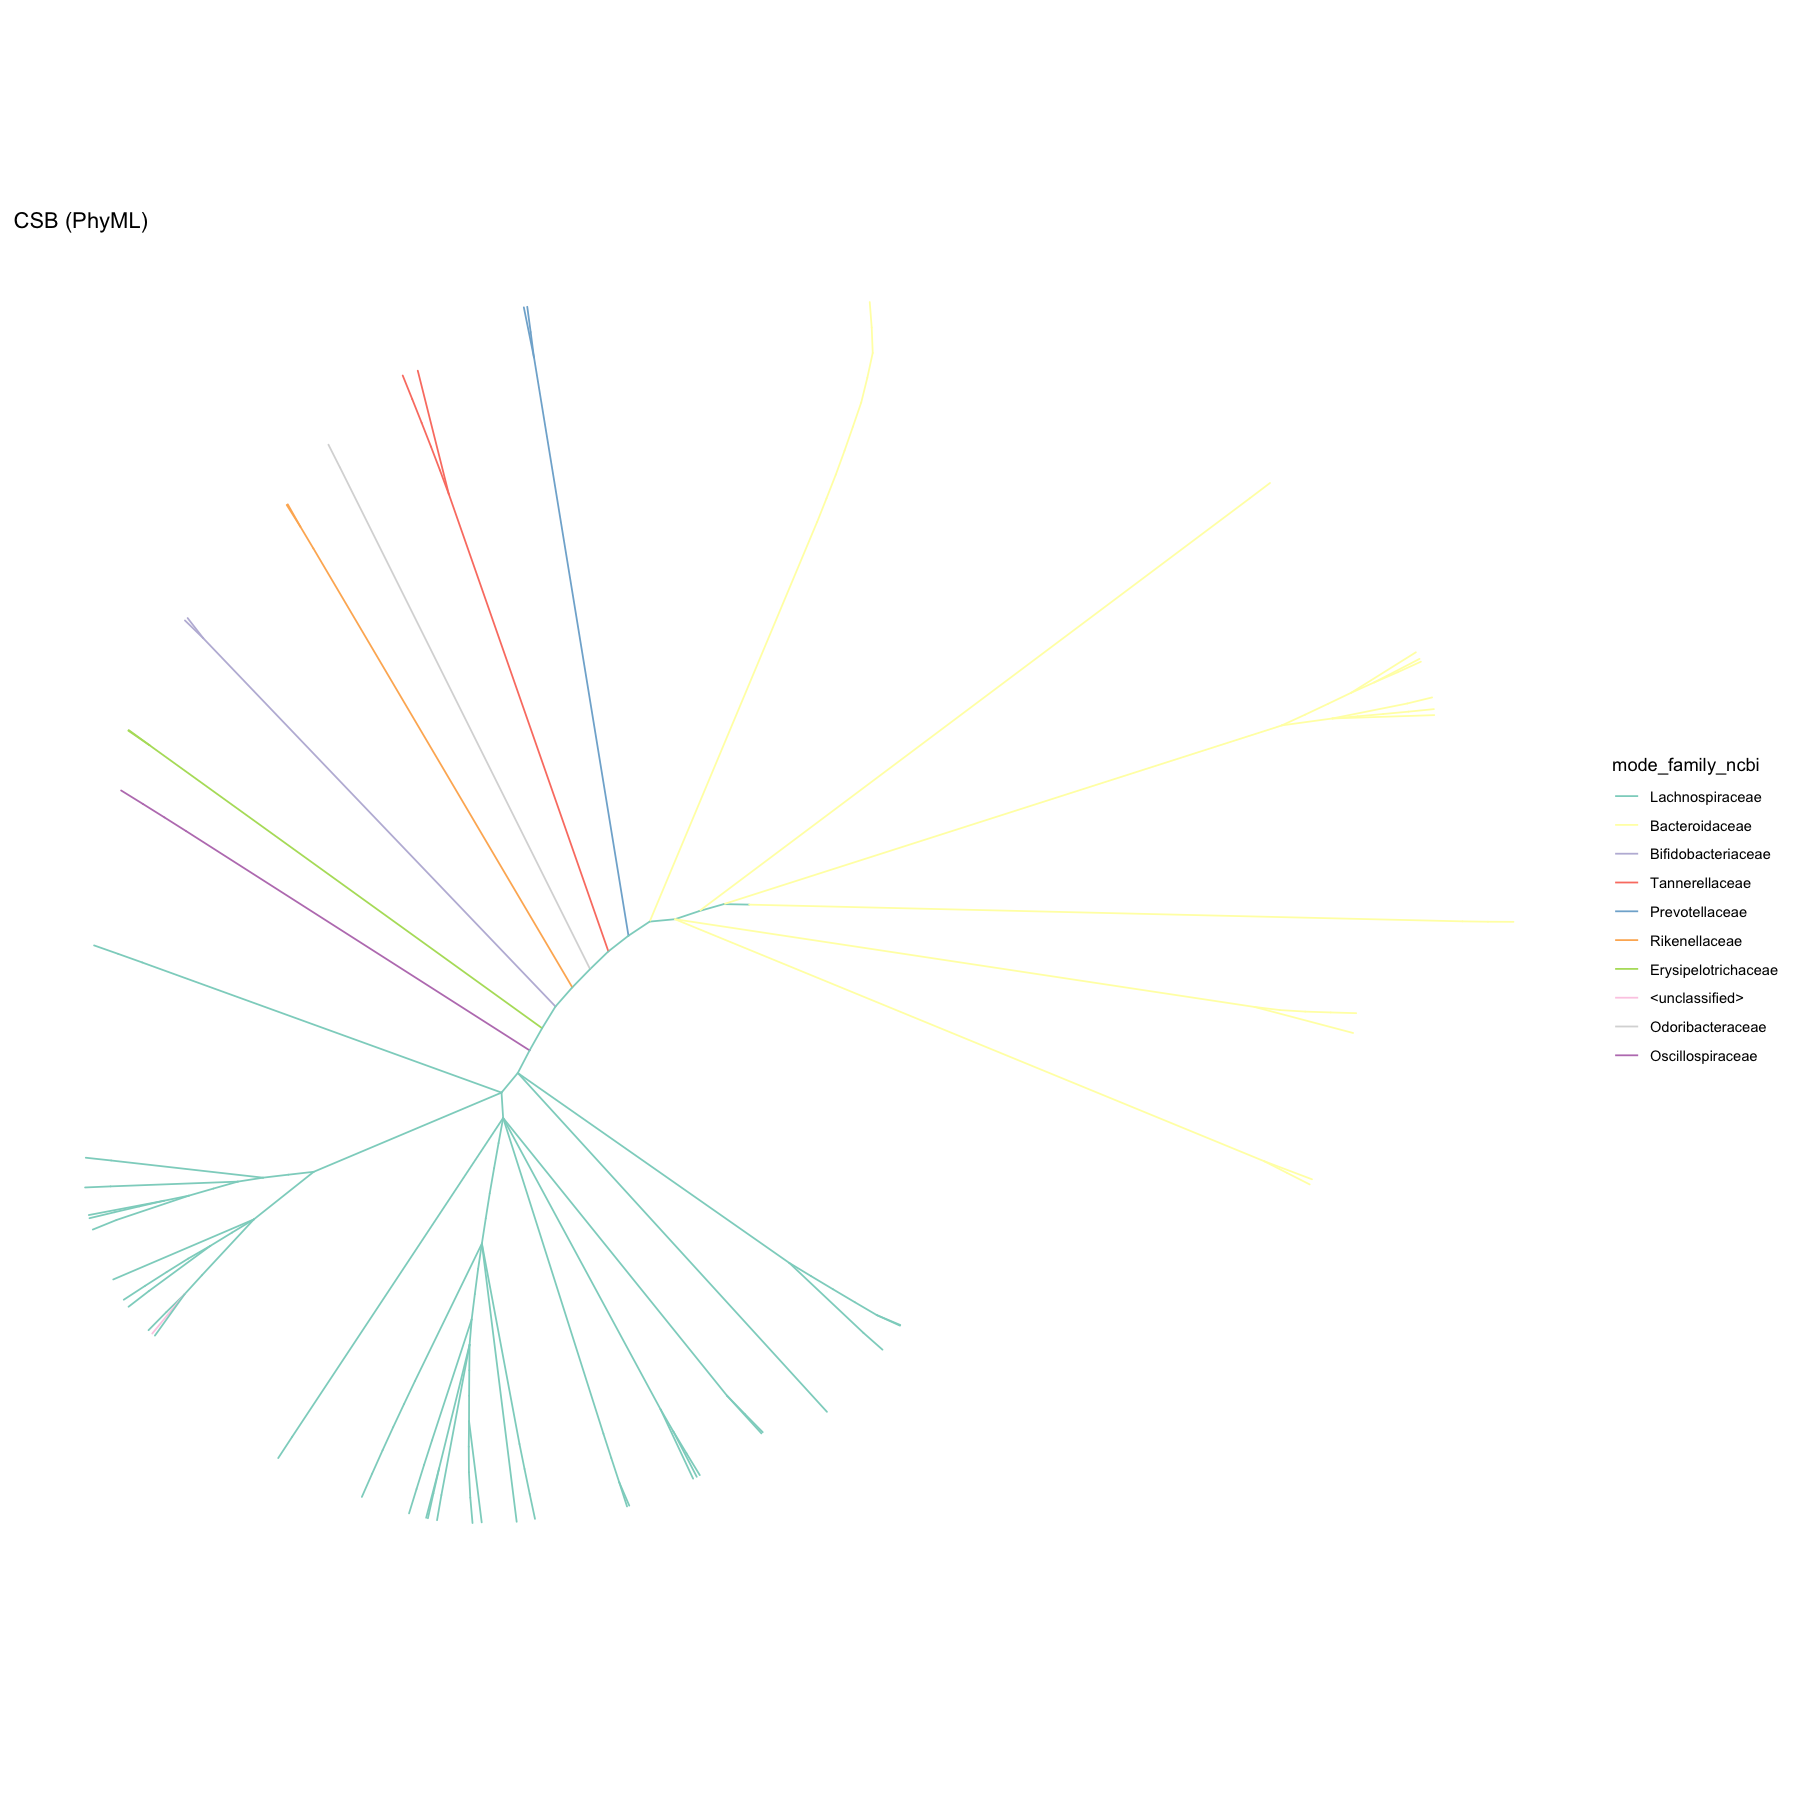

In [15]:
options(repr.plot.width=15, repr.plot.height=15, ignore.negative.edge=TRUE)
colorvalues = RColorBrewer::brewer.pal(12, name="Set3")
ggtree(tree_withdata, 
    aes(color=mode_family_ncbi, subset=support > .5), 
    layout="equal_angle", open.angle=5,
    branch.length="none",
    ) +# %>% rotate_tree(-240) +
    ggtitle("CSB (PhyML)") + 
    # scale_color_discrete(type=colorvalues)
    scale_color_manual(values=colorvalues, breaks=labels(biggerfamily_ncbi)[[1]]) #+theme(legend.position="none")

In [25]:
ggsave(file.path(pdir, "CSB669_PhyML_unrooted.pdf"), 
    height=7,
    width=7,
)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



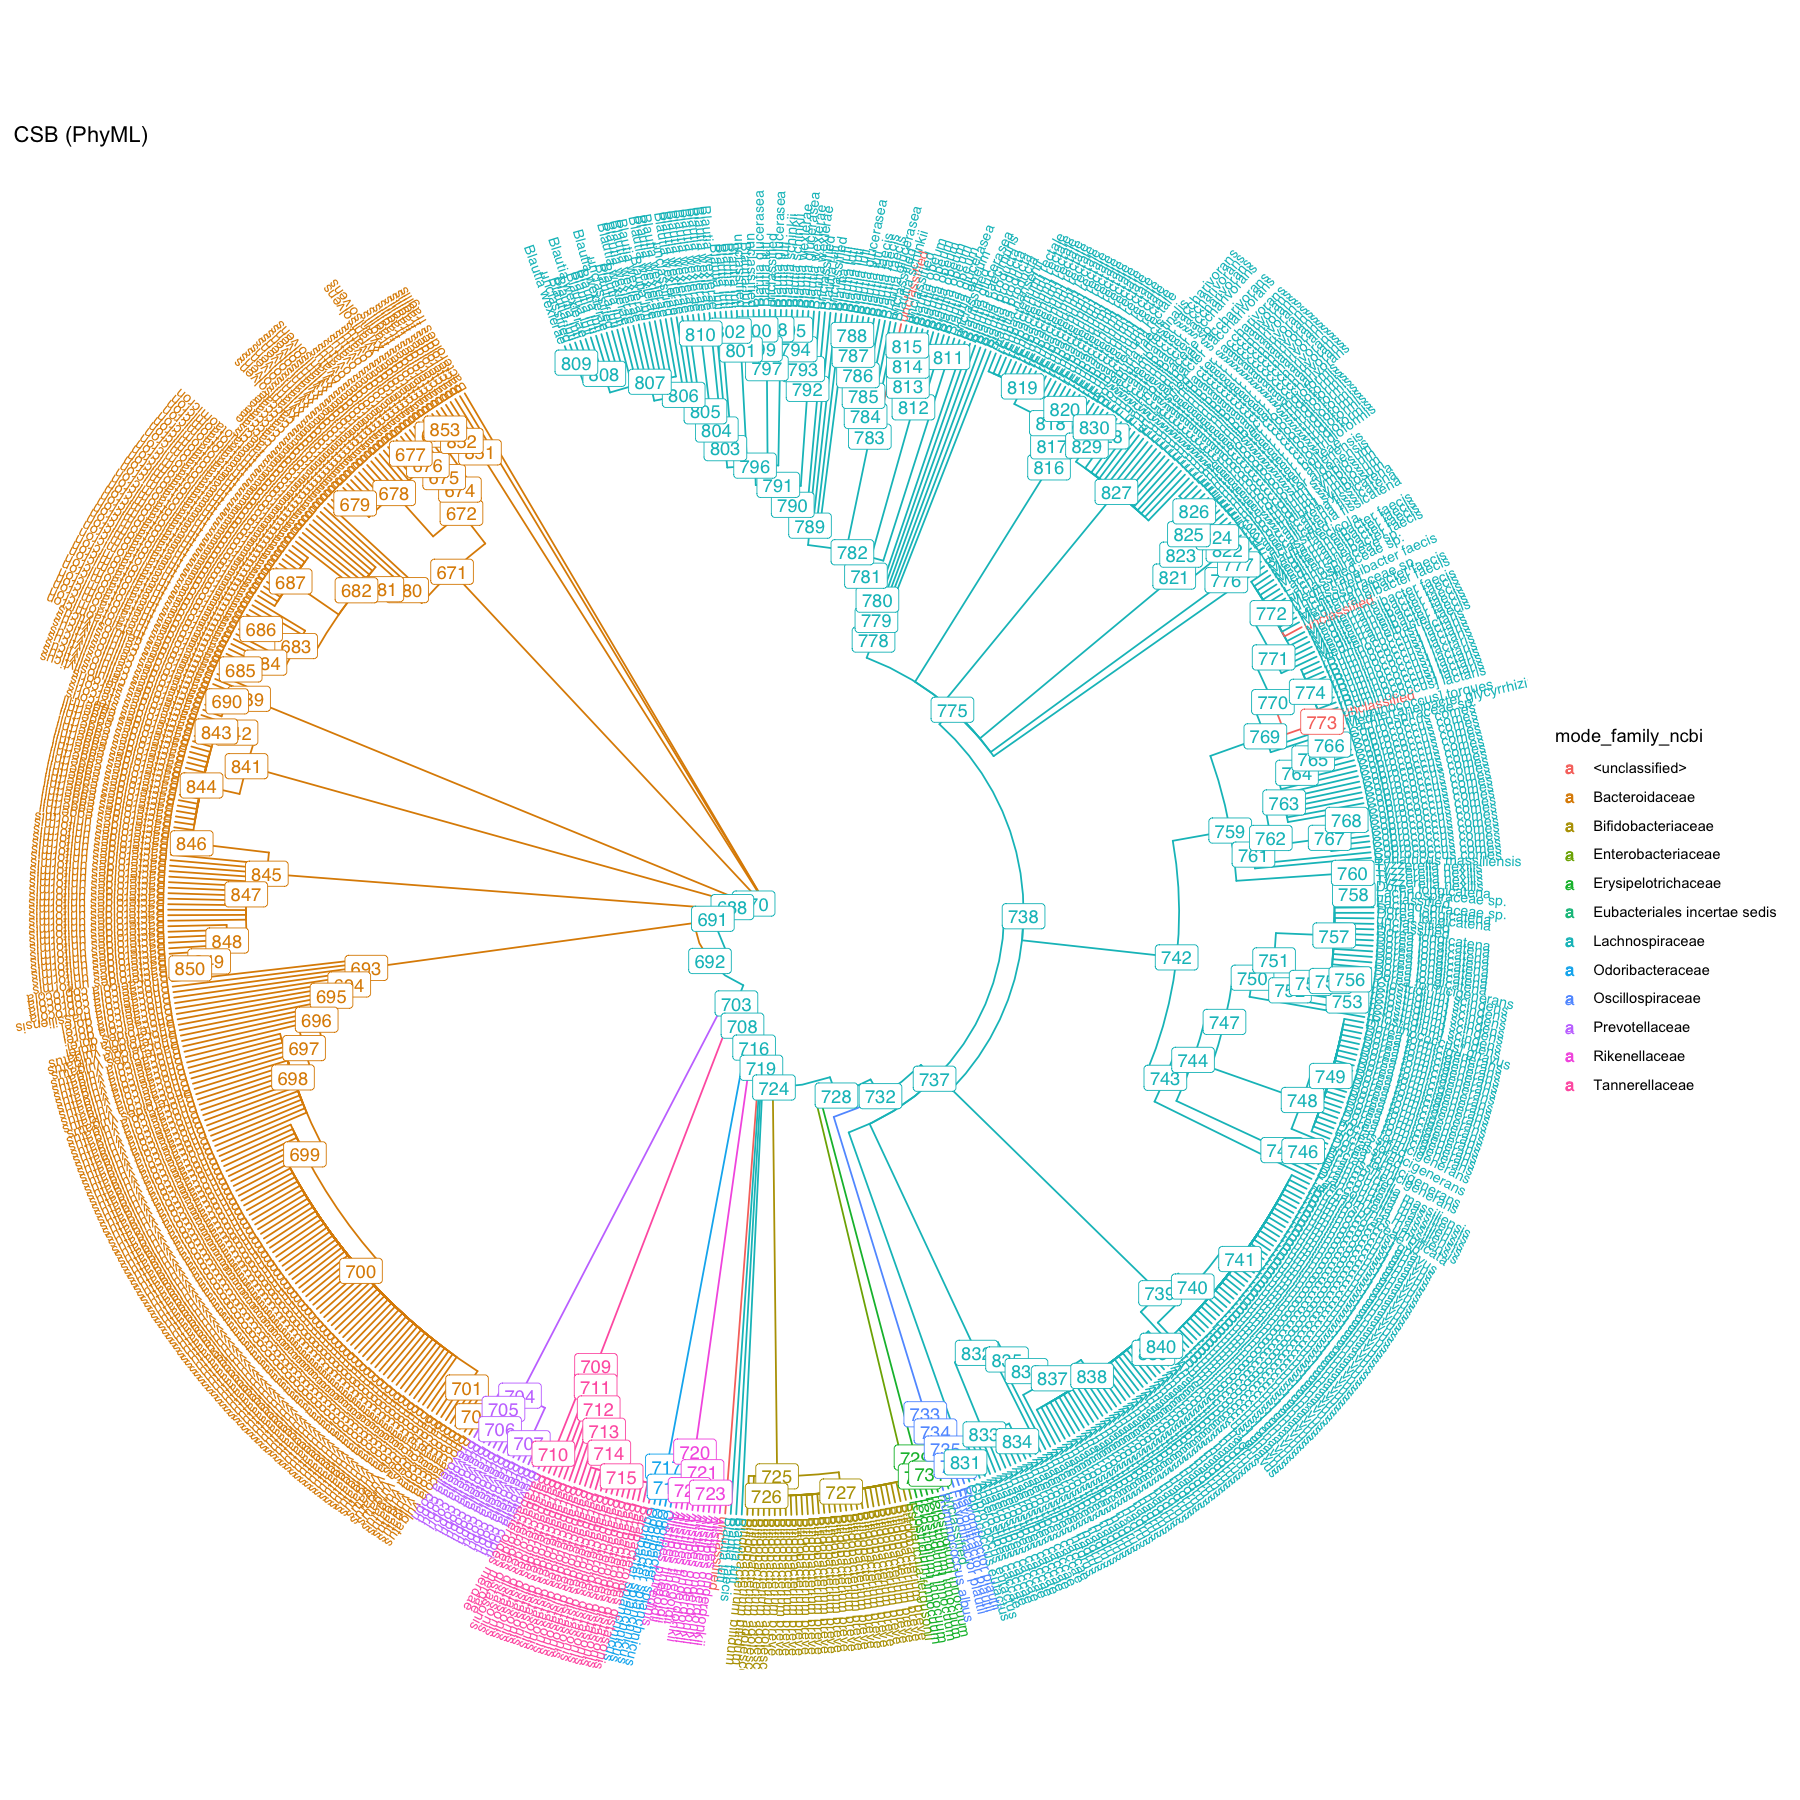

In [270]:
options(repr.plot.width=15, repr.plot.height=15, ignore.negative.edge=TRUE)
colorvalues = RColorBrewer::brewer.pal(12, name="Set3")
ggtree(tree_withdata, 
    aes(color=mode_family_ncbi, subset=support > .5), 
    layout="fan", open.angle=10,
    branch.length="none",
    )  %>% rotate_tree(-240) +
    ggtitle("CSB (PhyML)") + 
    geom_label2(aes(label=node)) +
    geom_tiplab(aes(label=species), size=3) #+
    # scale_color_discrete(type=colorvalues)
    # scale_color_manual(values=colorvalues, breaks=labels(biggerfamily_ncbi)[[1]]) #+theme(legend.position="none")

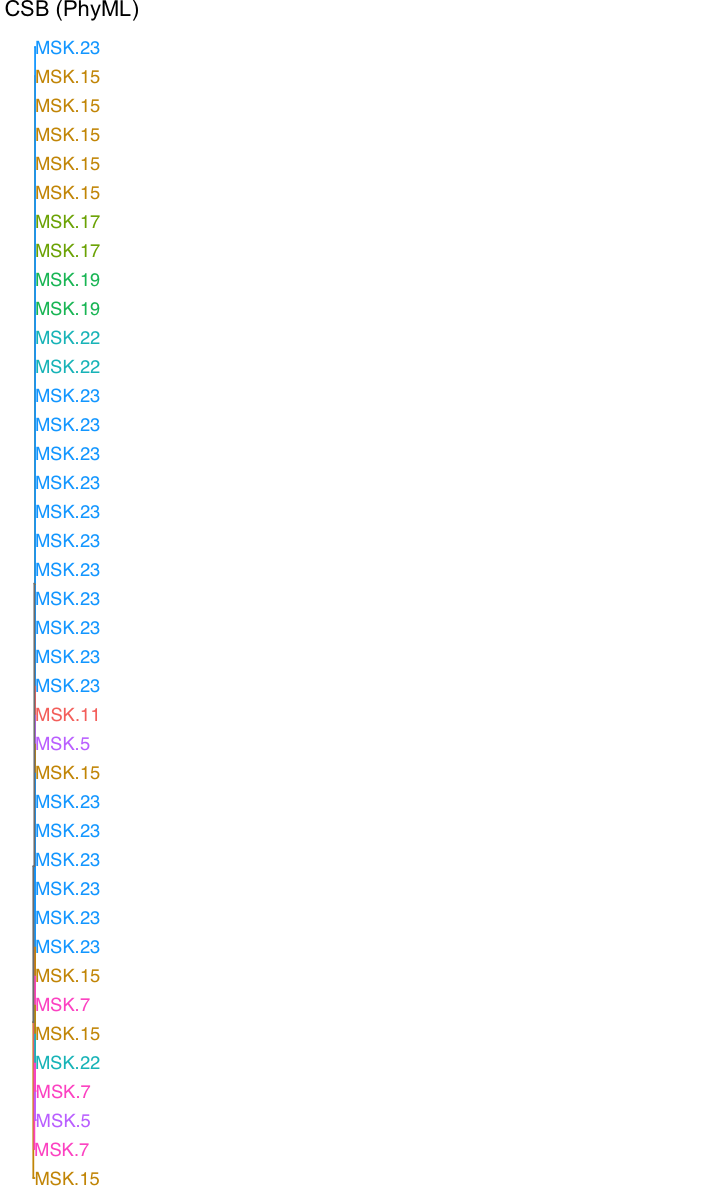

In [21]:
options(repr.plot.width=6, repr.plot.height=10, ignore.negative.edge=TRUE)
colorvalues = RColorBrewer::brewer.pal(12, name="Set3")
ggtree(tree_subset(tree_withdata, "MSK.5.17", levels_back = 3), 
    aes(color=donor), 
    layout="rect", open.angle=10,
    # branch.length="none",
    ) + 
    ggtitle("CSB (PhyML)") + 
    theme(legend.position = "none", plot.margin = margin(r=50)) +
    xlim(0, 4) +
    # geom_label2(aes(label=node))  +
    geom_tiplab(aes(label=donor))
    # scale_color_discrete(type=colorvalues)
    # scale_color_manual(values=colorvalues, breaks=labels(biggerfamily_ncbi)[[1]]) #

In [294]:
ggsave(file.path(pdir, "CSB669_PhyML_rgnavus.pdf"), 
    height=7,
    width=4.5,
)

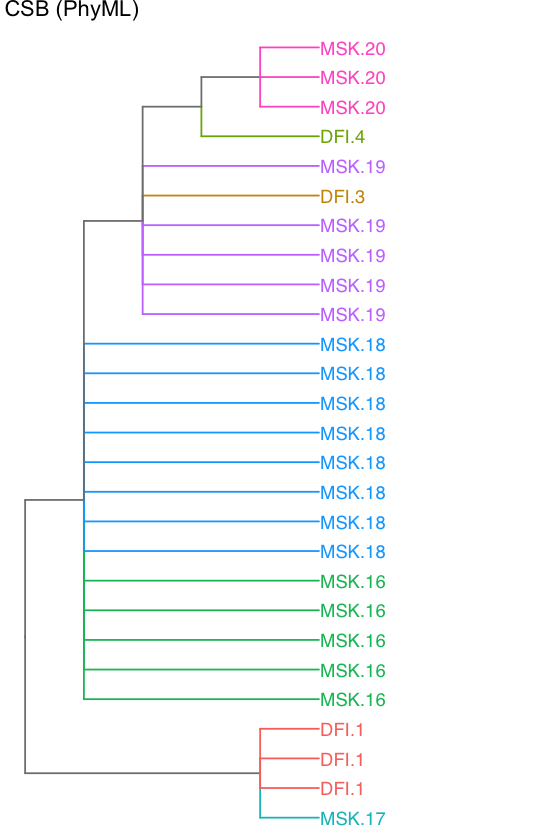

In [19]:
options(repr.plot.width=4.5, repr.plot.height=7, ignore.negative.edge=TRUE)
colorvalues = RColorBrewer::brewer.pal(12, name="Set3")
ggtree(tree_subset(tree_withdata, "MSK.19.84", levels_back = 3), 
    aes(color=donor), 
    layout="rect", open.angle=10,
    # branch.length="none",
    ) + 
    ggtitle("CSB (PhyML)") + 
    theme(legend.position = "none", plot.margin = margin(r=50)) +
    xlim(0, 7) +
    # geom_label2(aes(label=node))  +
    geom_tiplab(aes(label=donor))
    # scale_color_discrete(type=colorvalues)
    # scale_color_manual(values=colorvalues, breaks=labels(biggerfamily_ncbi)[[1]]) #

In [21]:
ggsave(file.path(pdir, "CSB669_PhyML_buniformis.pdf"), 
    height=7,
    width=4.5,
)

## bac120 tree

In [12]:
ddir = file.path(getwd(), "data", "exp_pro", "BB669")
tdir = file.path(getwd(), "_research", "BB669_bac120_phyml")

In [13]:
pdir = file.path(getwd(), "plots", "BB669_bac120trees")
dir.create(pdir, FALSE, TRUE)

In [15]:
tree = read.newick(file.path(tdir, "BB669_bac120.phy-supporttree_multi.txt"), node.label='support')

In [16]:
lineagedf = read.csv(file.path(ddir, "BB669_rowmeta.csv"))
lineagedf$label = lineagedf$ID
subset_lineagedf = lineagedf[match(tree@phylo$tip.label, lineagedf$label),]

In [17]:
subset_lineagedf %>% dim

[1] 664  26

In [18]:
biggerfamily_ncbi = sort(table(subset_lineagedf$family_ncbi), decreasing = TRUE)[sort(table(subset_lineagedf$family_ncbi), decreasing = TRUE) > 0]

In [19]:
labels(biggerfamily_ncbi)[[1]]

[1] "Lachnospiraceae"              "Bacteroidaceae"              
 [3] "Bifidobacteriaceae"           "Tannerellaceae"              
 [5] "Prevotellaceae"               "Rikenellaceae"               
 [7] "Erysipelotrichaceae"          "Odoribacteraceae"            
 [9] "Oscillospiraceae"             "<unclassified>"              
[11] "Enterobacteriaceae"           "Eubacteriales incertae sedis"

In [20]:
# biggerphylum  = sort(table(subset_lineagedf$phylum), decreasing = TRUE)[sort(table(subset_lineagedf$phylum), decreasing = TRUE) > 100]
# bigphylum = subset_lineagedf$phylum
# bigphylum[!(bigphylum %in% names(biggerphylum))] = "Misc. (# < 100)"
# bigphylum[bigphylum == ""] = "unknown"
# subset_lineagedf$bigphylum = bigphylum

In [21]:
tree_withdata = as.treedata(left_join(as_tibble(tree), subset_lineagedf, by='label'))

In [22]:
# tree_withdata = di2multi(tree_withdata, tol=.0000001)

In [23]:
btree_tbl = as_tibble(tree_withdata)

mode_family_ncbi = offspring(btree_tbl, btree_tbl$node, tiponly = FALSE, self_include = TRUE)
mode_family_ncbi = unlist(lapply(mode_family_ncbi, function(x) modeest::mfv1(x$family_ncbi, na_rm=TRUE)))

btree_tbl$mode_family_ncbi = mode_family_ncbi
tree_withdata = as.treedata(btree_tbl)

Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr



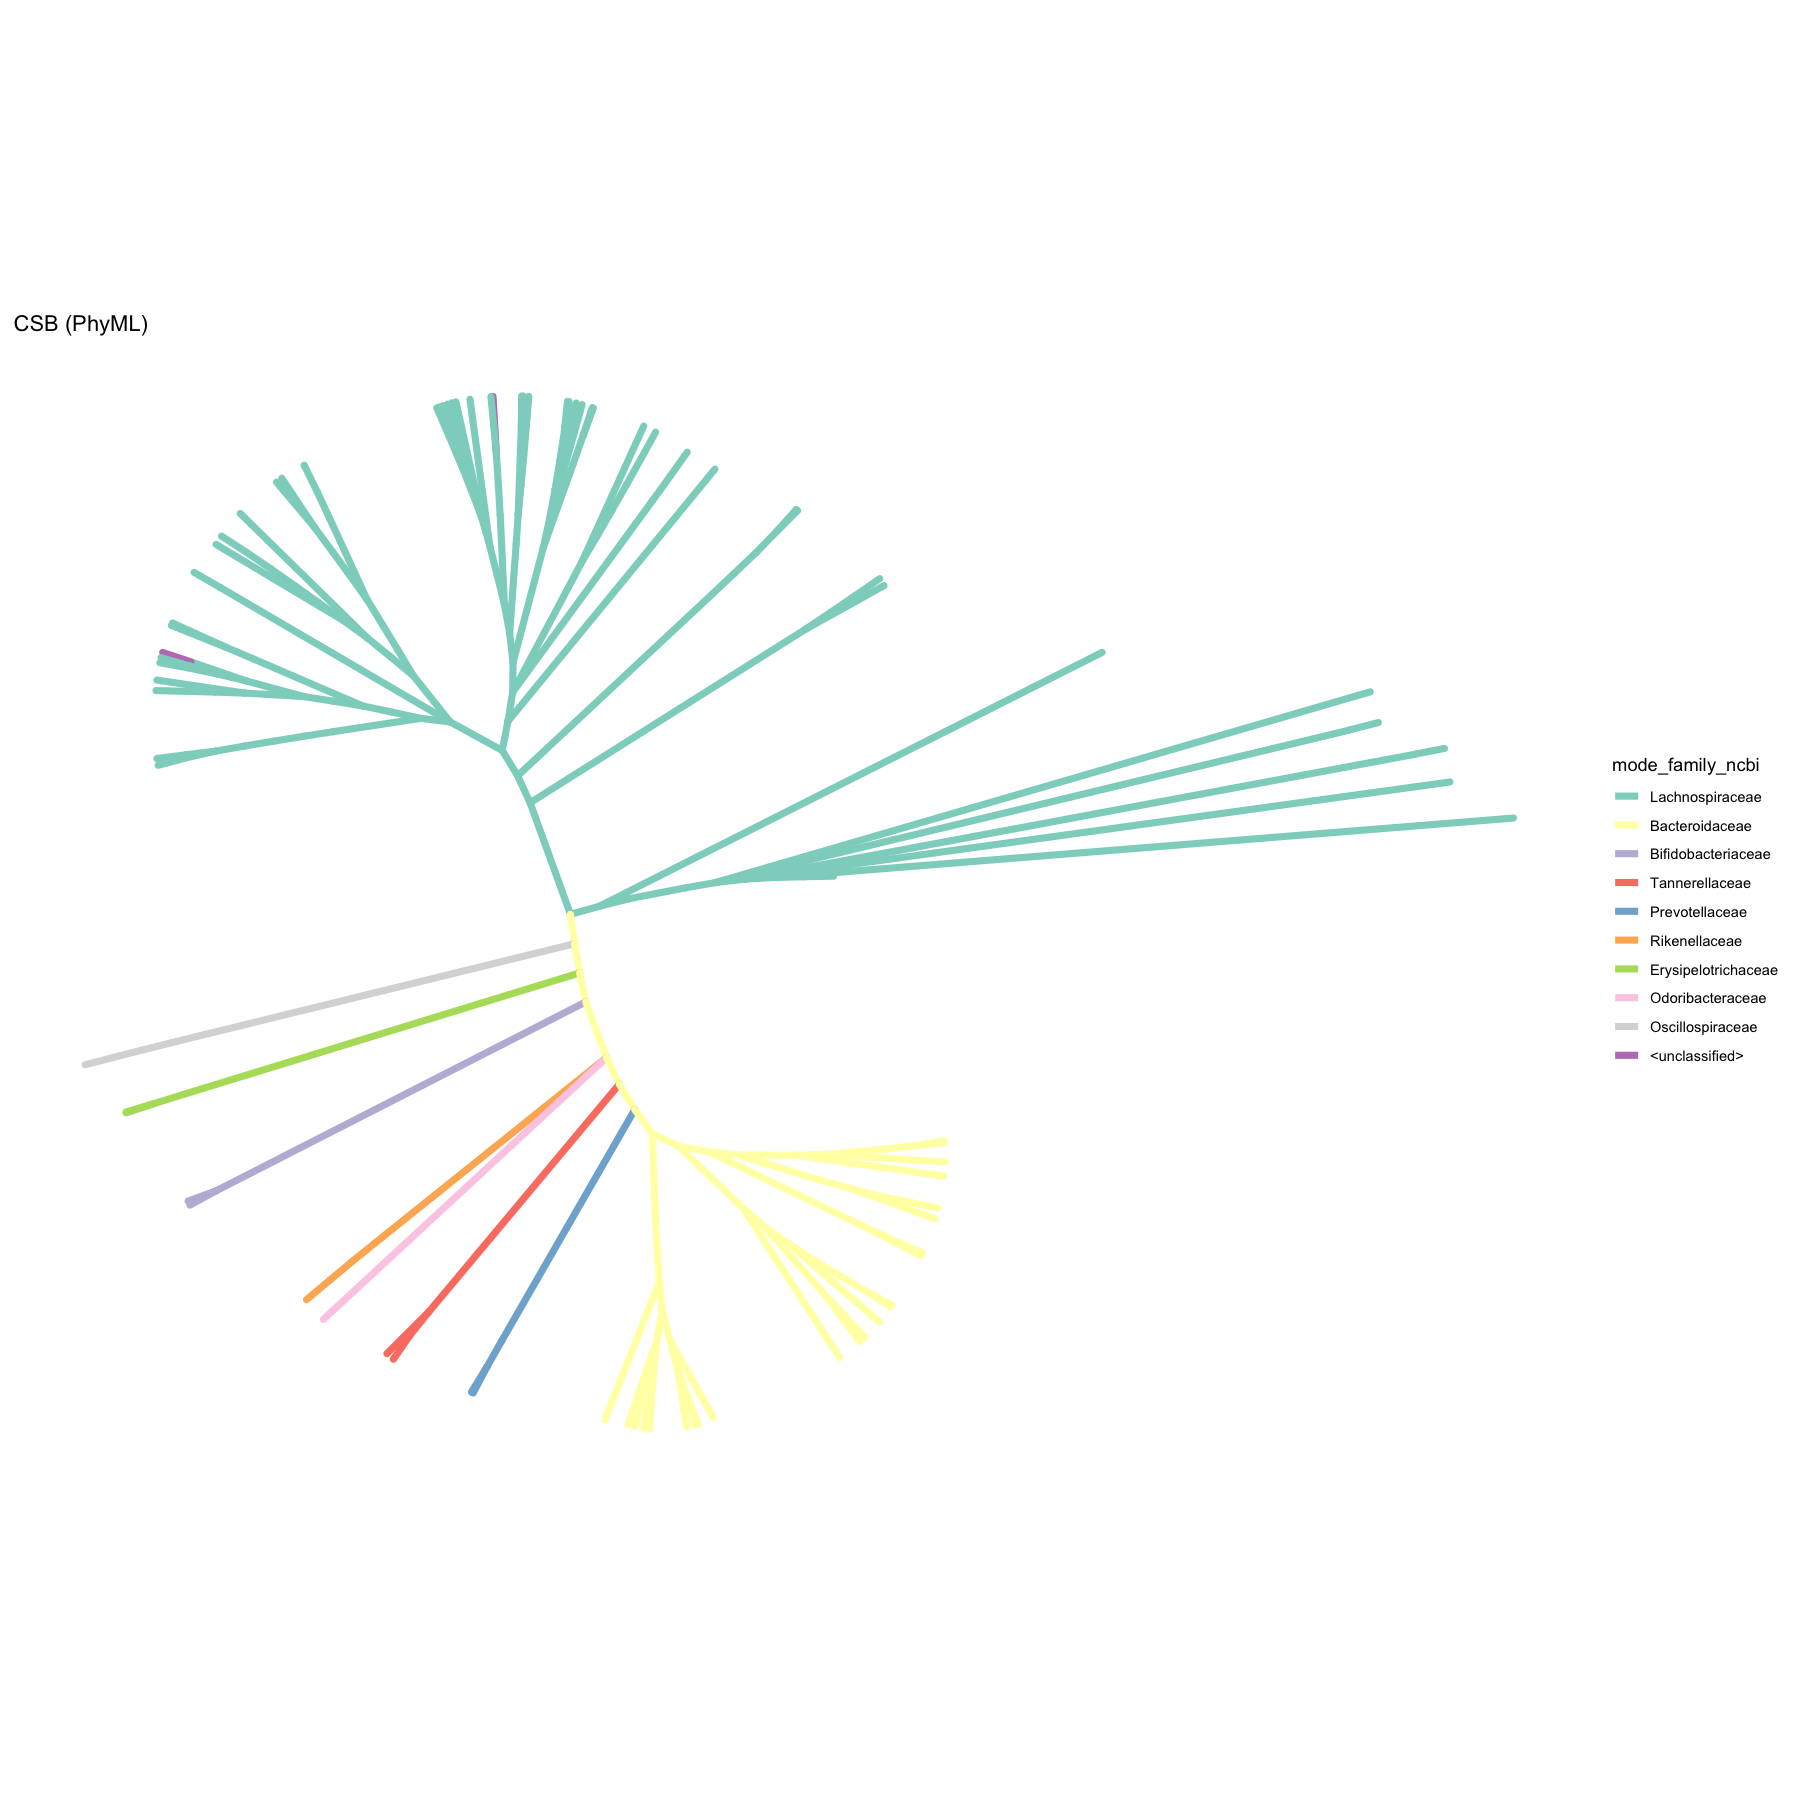

In [26]:
options(repr.plot.width=15, repr.plot.height=15, ignore.negative.edge=TRUE)
colorvalues = RColorBrewer::brewer.pal(12, name="Set3")
ggtree(tree_withdata, 
    aes(color=mode_family_ncbi, subset=support > .5), 
    layout="equal_angle", open.angle=5,
    branch.length="none", size=2,
    ) +# %>% rotate_tree(-240) +
    ggtitle("CSB (PhyML)") + 
    # scale_color_discrete(type=colorvalues)
    scale_color_manual(values=colorvalues, breaks=labels(biggerfamily_ncbi)[[1]]) #+theme(legend.position="none")

In [17]:
ggsave(file.path(pdir, "CSB669_PhyML_unrooted.pdf"), 
    height=7,
    width=7,
)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



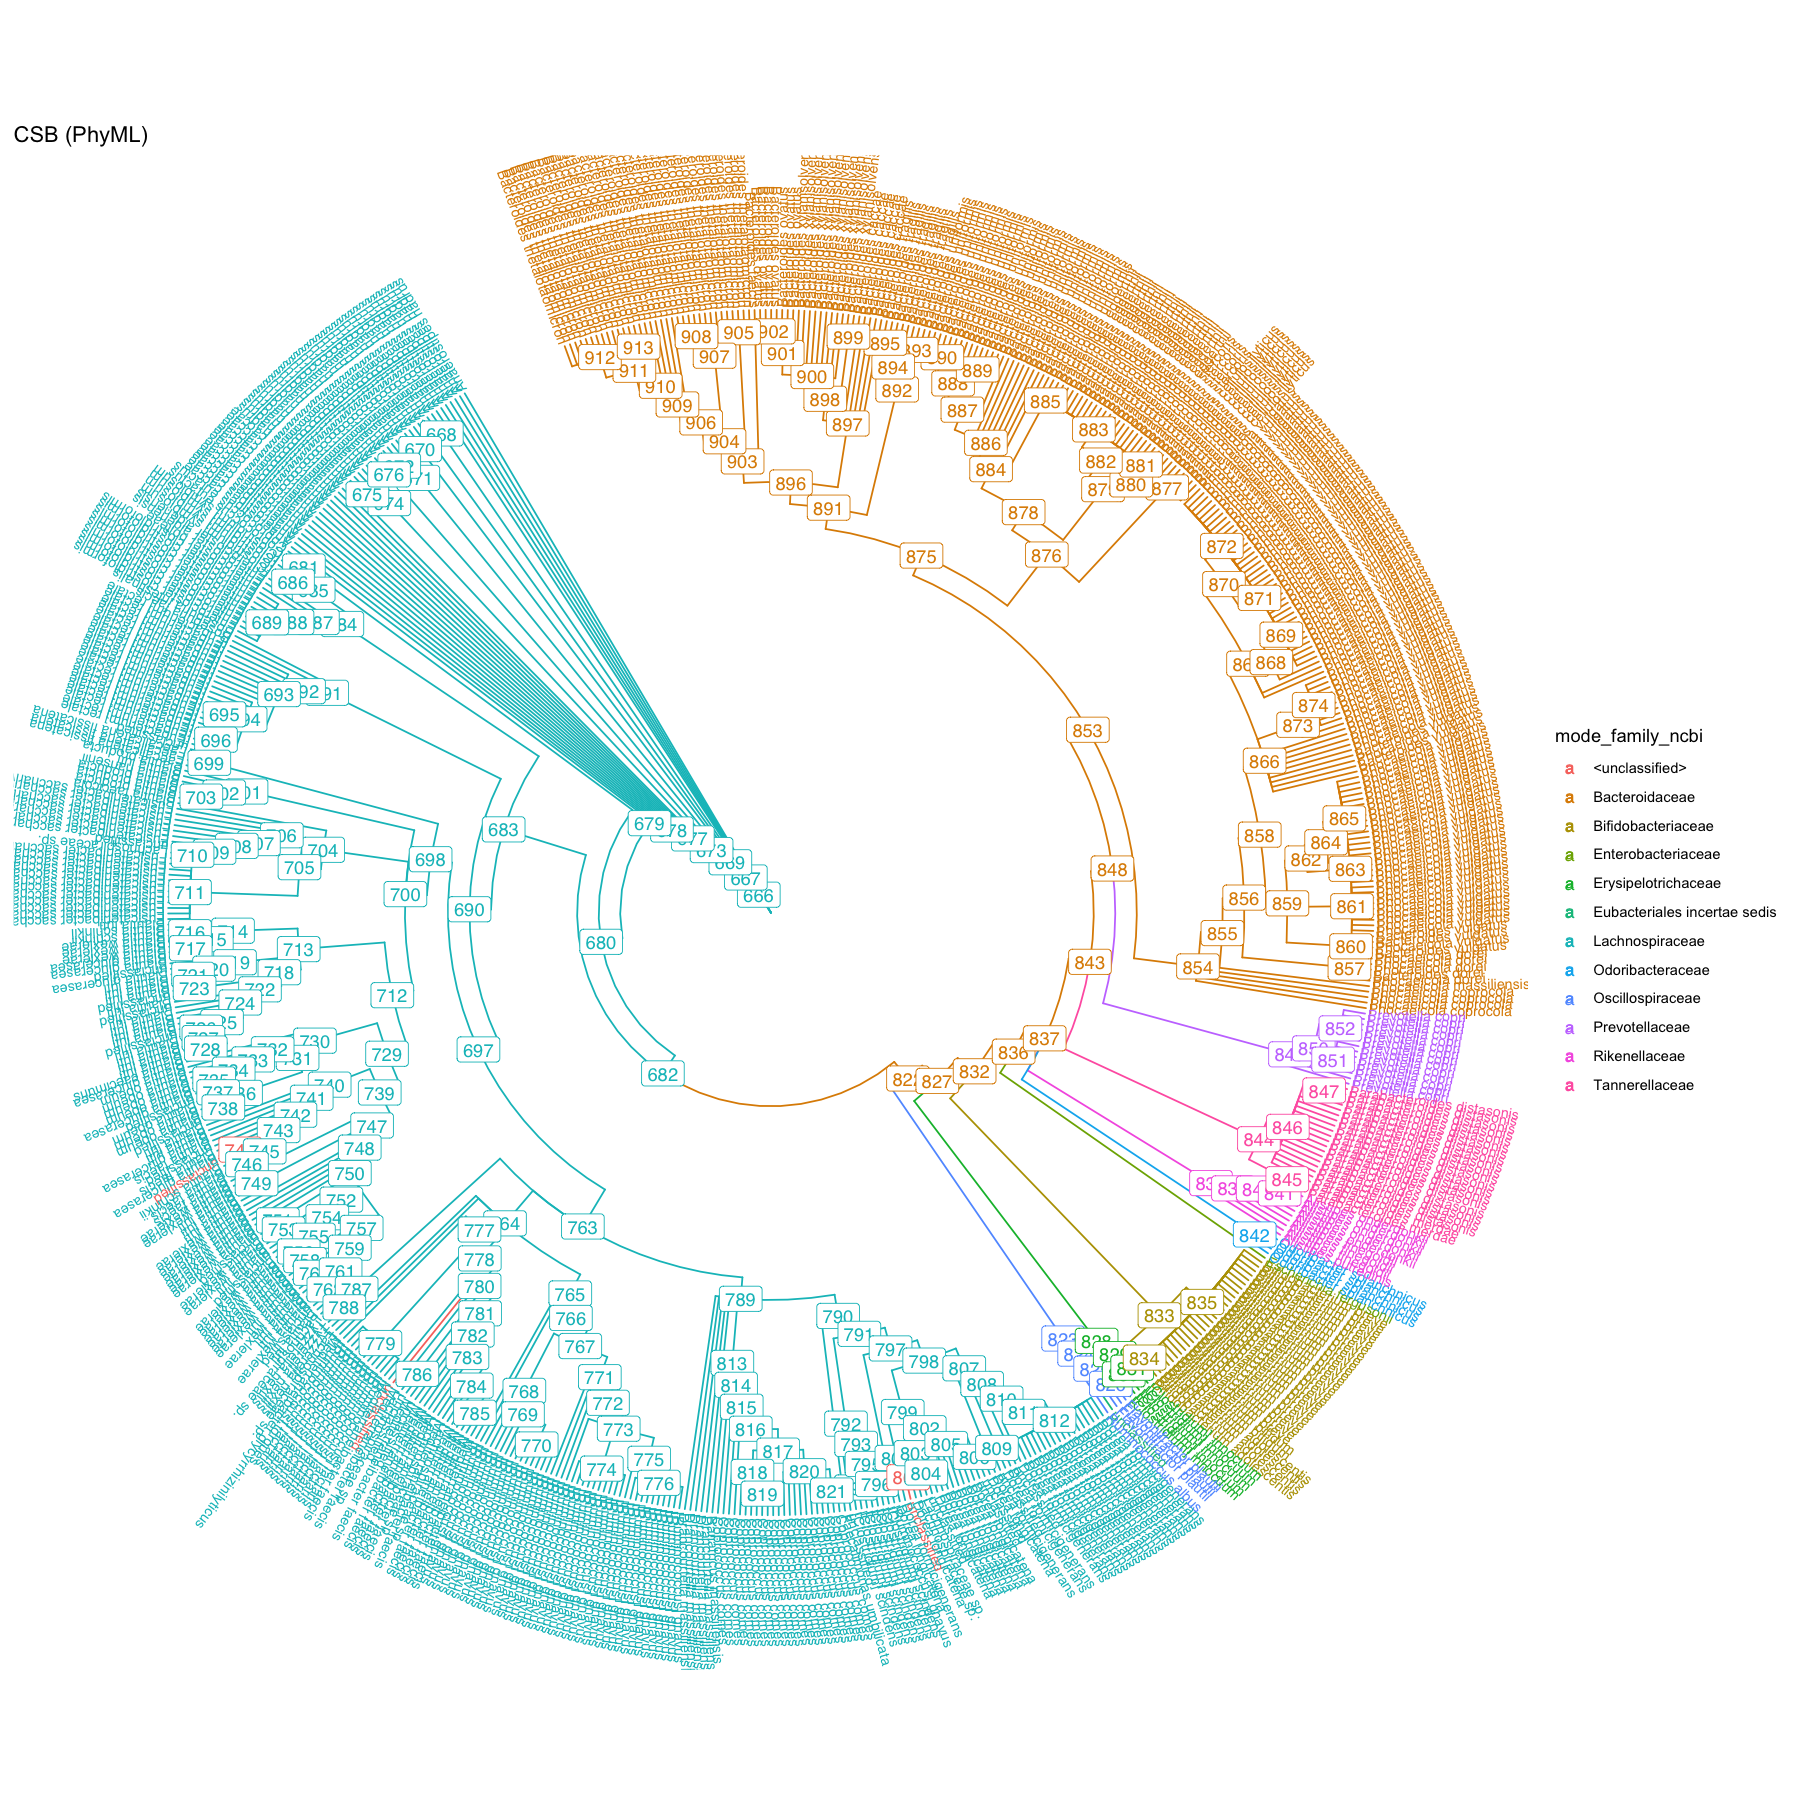

In [18]:
options(repr.plot.width=15, repr.plot.height=15, ignore.negative.edge=TRUE)
colorvalues = RColorBrewer::brewer.pal(12, name="Set3")
ggtree(tree_withdata, 
    aes(color=mode_family_ncbi, subset=support > .5), 
    layout="fan", open.angle=10,
    branch.length="none",
    )  %>% rotate_tree(-240) +
    ggtitle("CSB (PhyML)") + 
    geom_label2(aes(label=node)) +
    geom_tiplab(aes(label=species), size=3) #+
    # scale_color_discrete(type=colorvalues)
    # scale_color_manual(values=colorvalues, breaks=labels(biggerfamily_ncbi)[[1]]) #+theme(legend.position="none")

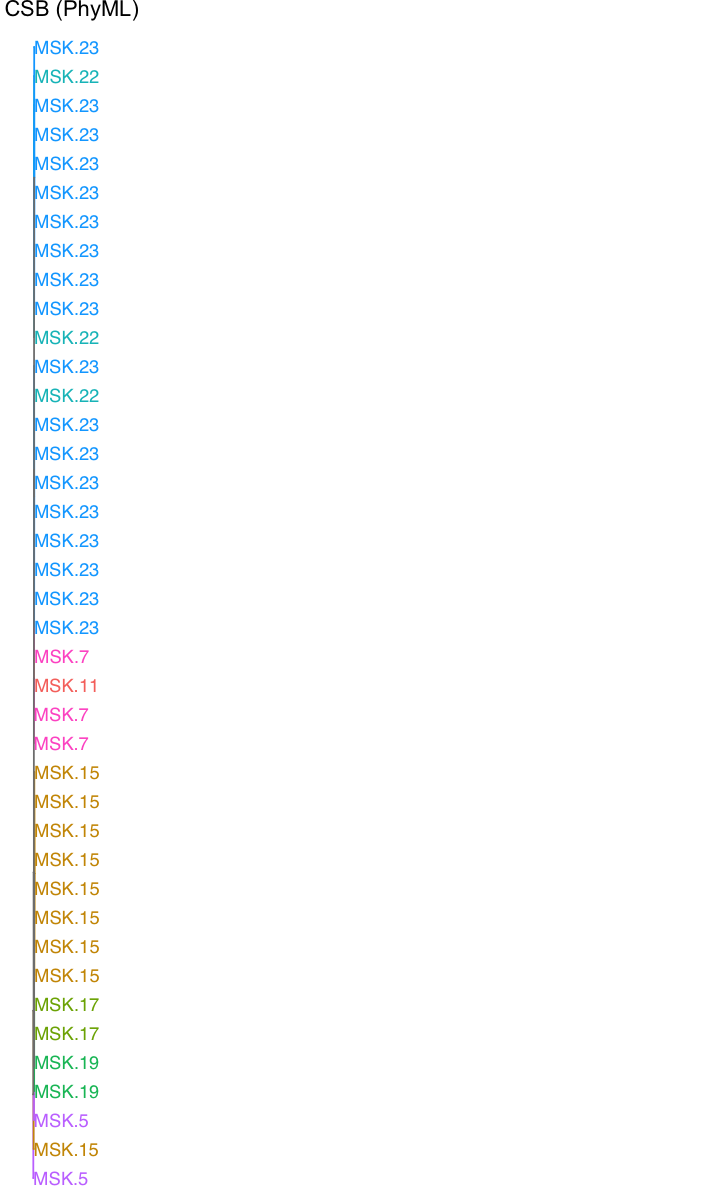

In [49]:
options(repr.plot.width=6, repr.plot.height=10, ignore.negative.edge=TRUE)
colorvalues = RColorBrewer::brewer.pal(12, name="Set3")
ggtree(tree_subset(tree_withdata, "MSK.5.17", levels_back = 1), 
    aes(color=donor), 
    layout="rect", open.angle=10,
    # branch.length="none",
    ) + 
    ggtitle("CSB (PhyML)") + 
    theme(legend.position = "none", plot.margin = margin(r=50)) +
    xlim(0, 4) +
    # geom_label2(aes(label=node))  +
    geom_tiplab(aes(label=donor))
    # scale_color_discrete(type=colorvalues)
    # scale_color_manual(values=colorvalues, breaks=labels(biggerfamily_ncbi)[[1]]) #

In [50]:
ggsave(file.path(pdir, "CSB669_PhyML_rgnavus.pdf"), 
    height=7,
    width=4.5,
)

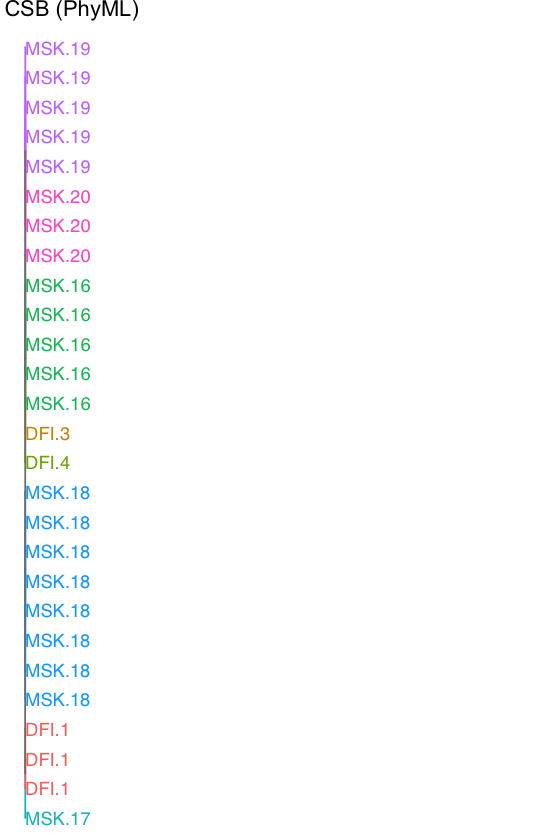

In [45]:
options(repr.plot.width=4.5, repr.plot.height=7, ignore.negative.edge=TRUE)
colorvalues = RColorBrewer::brewer.pal(12, name="Set3")
ggtree(tree_subset(tree_withdata, "MSK.19.84", levels_back = 5), 
    aes(color=donor), 
    layout="rect", open.angle=10,
    # branch.length="none",
    ) + 
    ggtitle("CSB (PhyML)") + 
    theme(legend.position = "none", plot.margin = margin(r=50)) +
    xlim(0, 7) +
    # geom_label2(aes(label=node))  +
    geom_tiplab(aes(label=donor))
    # scale_color_discrete(type=colorvalues)
    # scale_color_manual(values=colorvalues, breaks=labels(biggerfamily_ncbi)[[1]]) #

In [46]:
ggsave(file.path(pdir, "CSB669_PhyML_buniformis.pdf"), 
    height=7,
    width=4.5,
)